# BANK CHURN PROJECT
- Prediction of the main reason why people churn

## EDA


In [1]:
complete_records=read.csv("C:/Users/anton/Downloads/Bank_churn_project/Bank_churn_project/Customer-Churn-Records.csv")
# sampling the dataset since it is too large
set.seed(123)
# Create a sample of 1000 rows
sampled_indices = sample(1:nrow(complete_records), 1000, replace = FALSE)
# Extract the sample from the original dataset
records=complete_records[sampled_indices, ]
summary(records)

   RowNumber      CustomerId         Surname           CreditScore   
 Min.   :   1   Min.   :15566030   Length:1000        Min.   :350.0  
 1st Qu.:2750   1st Qu.:15630333   Class :character   1st Qu.:578.8  
 Median :5002   Median :15689774   Mode  :character   Median :651.0  
 Mean   :5120   Mean   :15691260                      Mean   :648.0  
 3rd Qu.:7690   3rd Qu.:15757610                      3rd Qu.:717.2  
 Max.   :9994   Max.   :15815316                      Max.   :850.0  
  Geography            Gender               Age            Tenure      
 Length:1000        Length:1000        Min.   :18.00   Min.   : 0.000  
 Class :character   Class :character   1st Qu.:32.00   1st Qu.: 2.000  
 Mode  :character   Mode  :character   Median :37.00   Median : 5.000  
                                       Mean   :38.78   Mean   : 4.948  
                                       3rd Qu.:44.00   3rd Qu.: 8.000  
                                       Max.   :80.00   Max.   :10.000  
    Ba

## DATA CLEANING

In [2]:
#checking if there are NA observations
sum(is.na(records))
#dropping irrelevant attributes
records=subset(records,select=-c(1:3))
View(records)
#we proceeded at analyzing data and factorizing the relevant attributes
records$Card.Type=as.factor(records$Card.Type)
records$Gender=as.factor(records$Gender)
records$Geography=as.factor(records$Geography)
records$Exited=as.factor(records$Exited)
records$HasCrCard=as.factor(records$HasCrCard)
records$Complain=as.factor(records$Complain)
records$IsActiveMember=as.factor(records$IsActiveMember)
#now check the distribution of data 
summary(records)
#I found out that data are balanced accross the different attributes 
#(i.e card.type value are similar among the clients)

[1] 0

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Card.Type,Point.Earned
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>
2463,672,France,Female,53,9,169406.33,4,1,1,147311.47,1,1,4,DIAMOND,232
2511,625,France,Female,52,2,79468.96,1,1,1,84606.03,0,0,2,PLATINUM,629
8718,443,France,Male,44,2,0.00,1,1,0,159165.70,0,0,3,PLATINUM,351
2986,840,France,Male,30,8,136291.71,1,1,0,54113.38,0,0,3,PLATINUM,938
1842,501,France,Female,34,3,107747.57,1,1,0,9249.36,0,0,5,GOLD,396
9334,755,France,Female,78,5,121206.96,1,1,1,76016.49,0,0,5,PLATINUM,554
3371,698,Spain,Female,47,6,0.00,1,1,0,50213.81,1,1,4,PLATINUM,625
4761,850,France,Male,40,1,76914.21,1,1,0,174183.44,0,0,2,DIAMOND,810
6746,552,Spain,Male,55,3,0.00,1,1,1,40333.94,0,0,4,SILVER,466


  CreditScore      Geography      Gender         Age            Tenure      
 Min.   :350.0   France :508   Female:454   Min.   :18.00   Min.   : 0.000  
 1st Qu.:578.8   Germany:227   Male  :546   1st Qu.:32.00   1st Qu.: 2.000  
 Median :651.0   Spain  :265                Median :37.00   Median : 5.000  
 Mean   :648.0                              Mean   :38.78   Mean   : 4.948  
 3rd Qu.:717.2                              3rd Qu.:44.00   3rd Qu.: 8.000  
 Max.   :850.0                              Max.   :80.00   Max.   :10.000  
    Balance       NumOfProducts   HasCrCard IsActiveMember EstimatedSalary    
 Min.   :     0   Min.   :1.000   0:294     0:511          Min.   :    11.58  
 1st Qu.:     0   1st Qu.:1.000   1:706     1:489          1st Qu.: 48157.59  
 Median : 98571   Median :1.000                            Median : 99440.65  
 Mean   : 77102   Mean   :1.531                            Mean   : 99058.16  
 3rd Qu.:127139   3rd Qu.:2.000                            3rd Qu.


  0   1 
784 216 

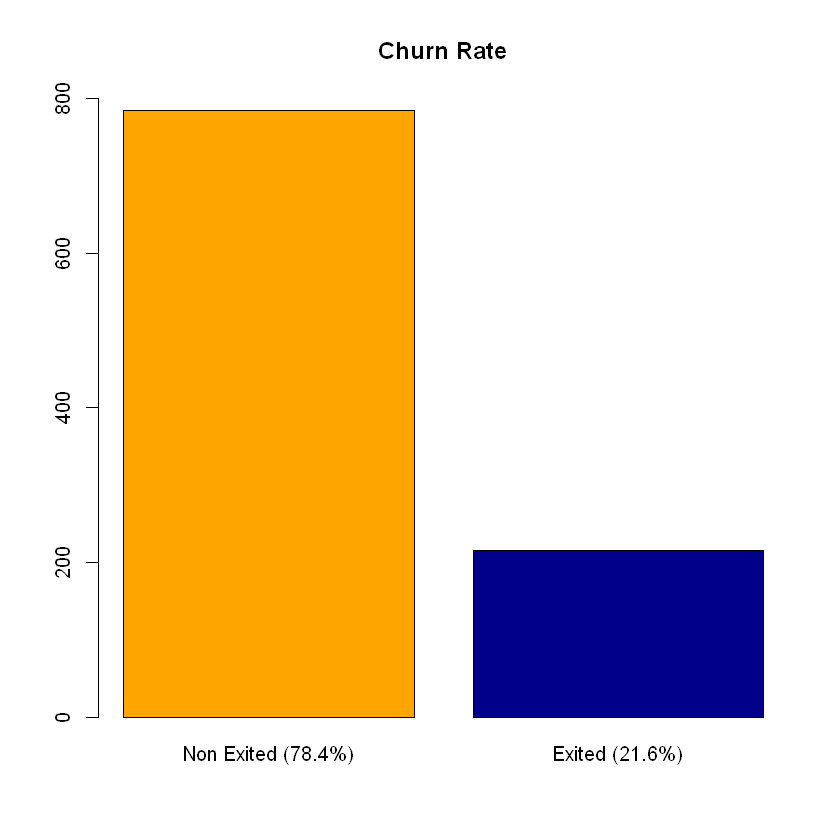

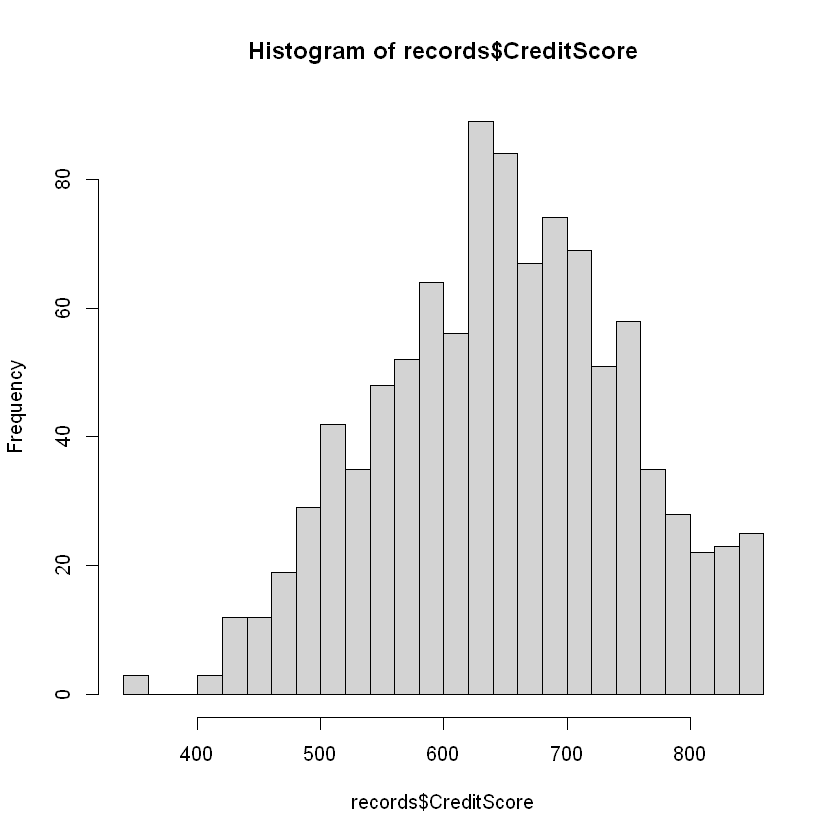

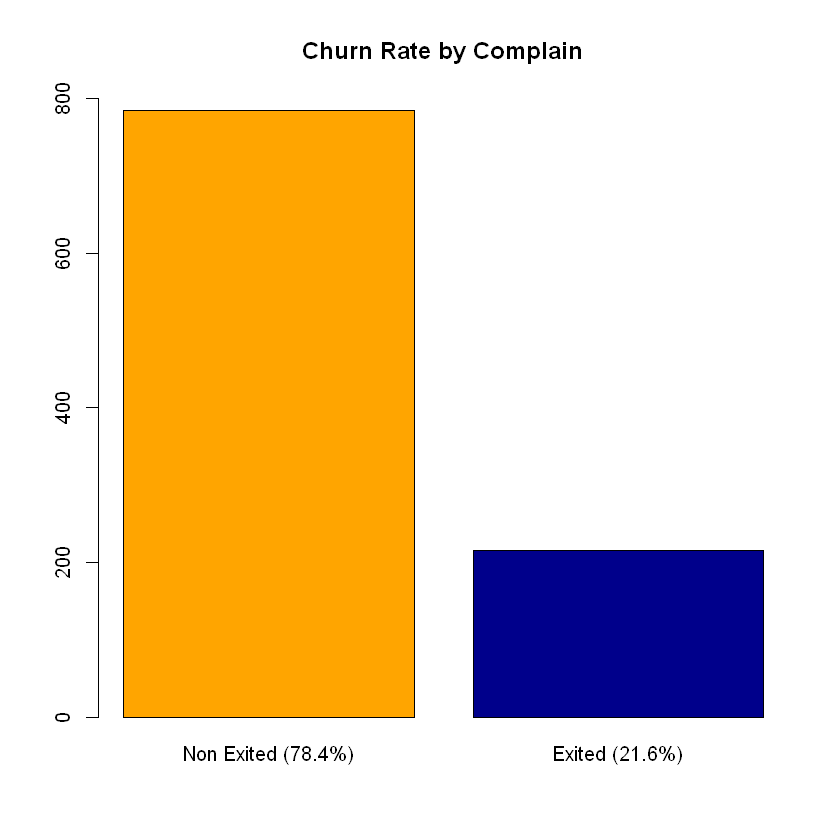

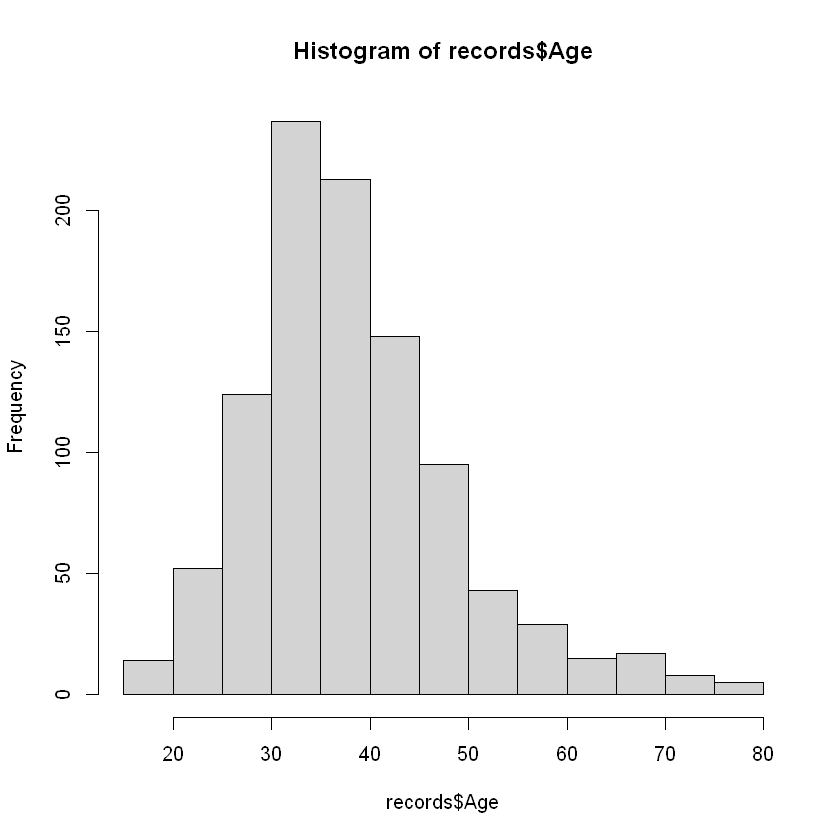

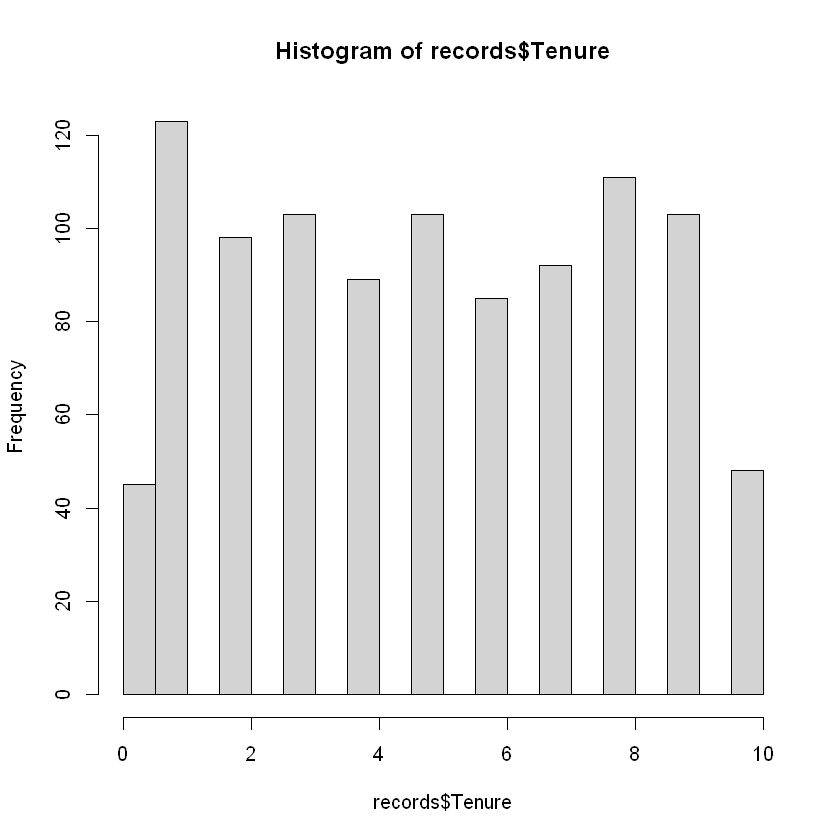

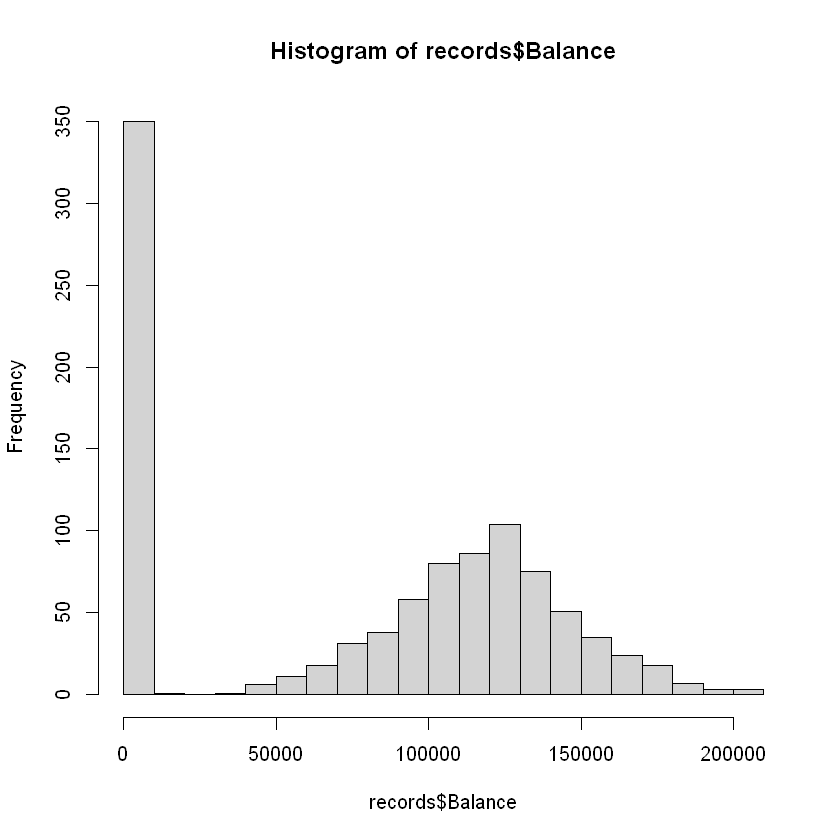

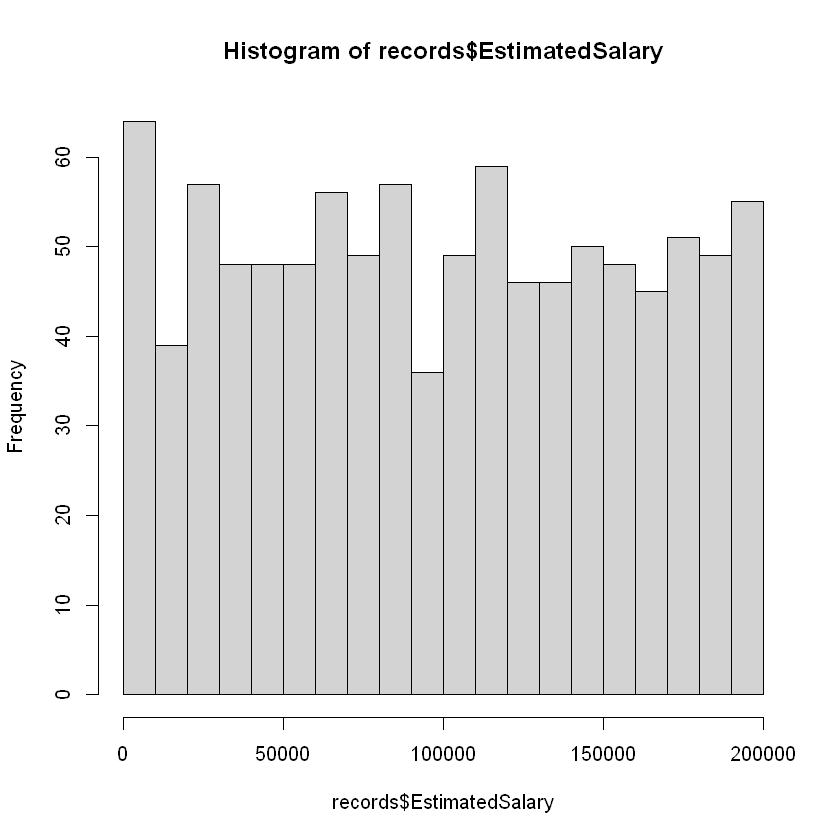

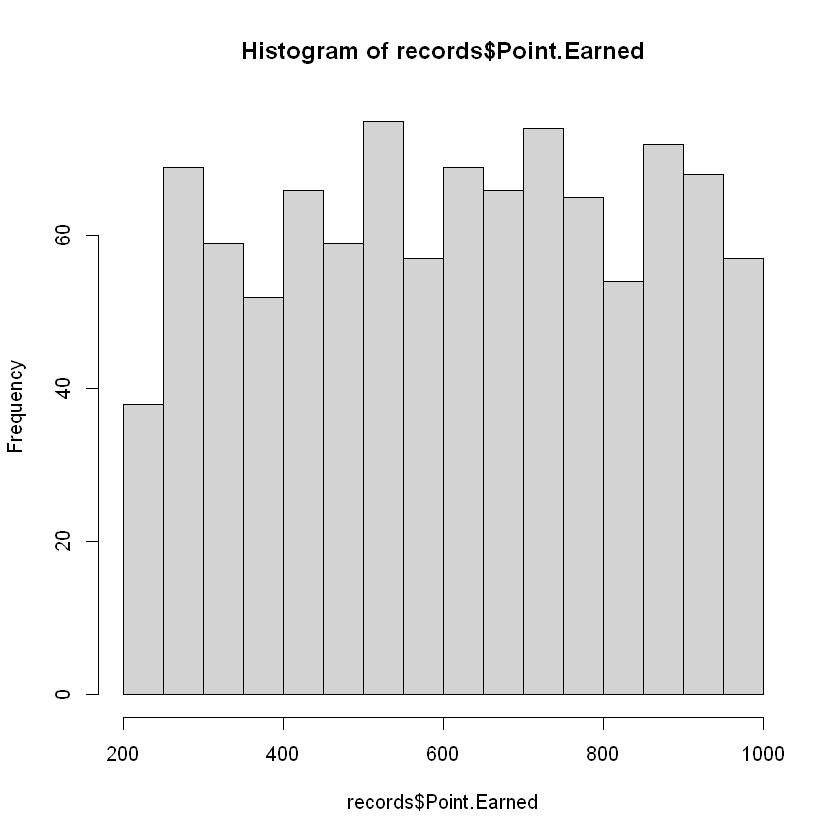

Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico o logico: si restituisce NA"
Warning message in mean.default(X[[i]], ...):
"l'argomento non è numerico

Group.1,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Card.Type,Point.Earned
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,652.2194,NA,NA,36.90179,4.943878,74209.50,1.514031,NA,NA,98489.77,NA,NA,3.020408,NA,613.8240
1,632.8333,NA,NA,45.61574,4.962963,87601.76,1.592593,NA,NA,101121.21,NA,NA,3.106481,NA,608.4306


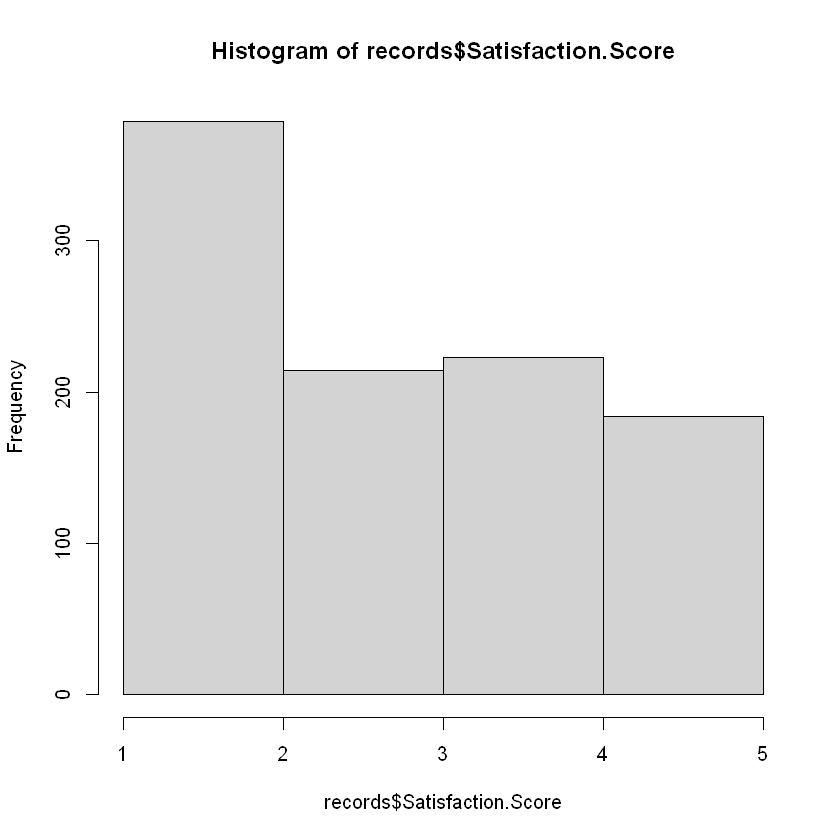

In [3]:
#We proceed at performing data visualization 
barplot(table(records$Exited), main= "Churn Rate", ylim=c(0,800), names.arg = c("Non Exited (78.4%)", "Exited (21.6%)"), col=c("orange", "darkblue"))
table(records$Exited)
hist(records$CreditScore,breaks=18)
barplot(table(records$Exited, records$Complain), main= "Churn Rate by Complain", ylim=c(0,800), names.arg = c("Non Exited (78.4%)", "Exited (21.6%)"), col=c("orange", "darkblue"))
# in order to find the right amount of bins I apply the sturges'rule 
#however we decide to increase a little bit the amount to make it looks like a normal distribution
#making histogram for every numerical attribute
hist(records$Age,breaks=18)
#k-squared distribution 
#Tenure=number of years that the customer has been a client of the bank. 
hist(records$Tenure,breaks=18)
#uniformed distribution 
hist(records$Balance,breaks=18)
hist(records$EstimatedSalary, breaks=18)
hist(records$Point.Earned, breaks=18)
hist(records$Satisfaction.Score, breaks=5)
aggregate(records, by=list(records$Exited), FUN=mean)

In [4]:
#check correlation among data (most relevant attributes)
cor(as.numeric(records$Exited), records$Age)
#result= 0.3423002 which means there is a little positive correlation 
cor(as.numeric(records$Exited), as.numeric(records$Complain))
#result= 1 which means there is a perfect positive correlation 

[1] 0.3423002

[1] 1

In [5]:
#making tables to check possible correlations with exited (churn or not)
table(records$Complain,records$Exited)
#perfect correlation among these 2 variables (when people complain they exit!)
table(records$Gender,records$Exited)
#therefore women are slighly more likely to churn
table(records$Card.Type, records$Exited)
#data are well balanced
table(records$Age>40, records$Exited)
#people older than 40 years are more likely to churn
table(records$Geography,records$Exited)
#German people are more likely to exit. 
table(records$IsActiveMember,records$Exited)
#when not active people exit more frequently 
table(records$HasCrCard,records$Exited)
#if no cards more likely to exit
table(records$Satisfaction.Score,records$Exited)
#1:17, 2:26, 3:16%, 4:27%, 5:20% Why?
table(records$Tenure,records$Exited)
#explained by the age
table(records$NumOfProducts, records$Exited)

   
      0   1
  0 784   0
  1   0 216

        
           0   1
  Female 336 118
  Male   448  98

          
             0   1
  DIAMOND  182  52
  GOLD     206  48
  PLATINUM 188  63
  SILVER   208  53

       
          0   1
  FALSE 573  67
  TRUE  211 149

         
            0   1
  France  414  94
  Germany 151  76
  Spain   219  46

   
      0   1
  0 376 135
  1 408  81

   
      0   1
  0 217  77
  1 567 139

   
      0   1
  1 143  30
  2 153  53
  3 180  34
  4 161  62
  5 147  37

    
       0   1
  0   28  17
  1  102  21
  2   77  21
  3   83  20
  4   69  20
  5   84  19
  6   67  18
  7   77  15
  8   79  32
  9   78  25
  10  40   8

   
      0   1
  1 385 137
  2 395  42
  3   4  25
  4   0  12

        Not Exited Exited Non Churn Ratio Churn Ratio
France         414     94        81.49606    18.50394
Germany        151     76        66.51982    33.48018
Spain          219     46        82.64151    17.35849


Warning message in plot.window(xlim, ylim, log = log, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"parametro grafico "legend" non valido"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"parametro grafico "legend" non valido"


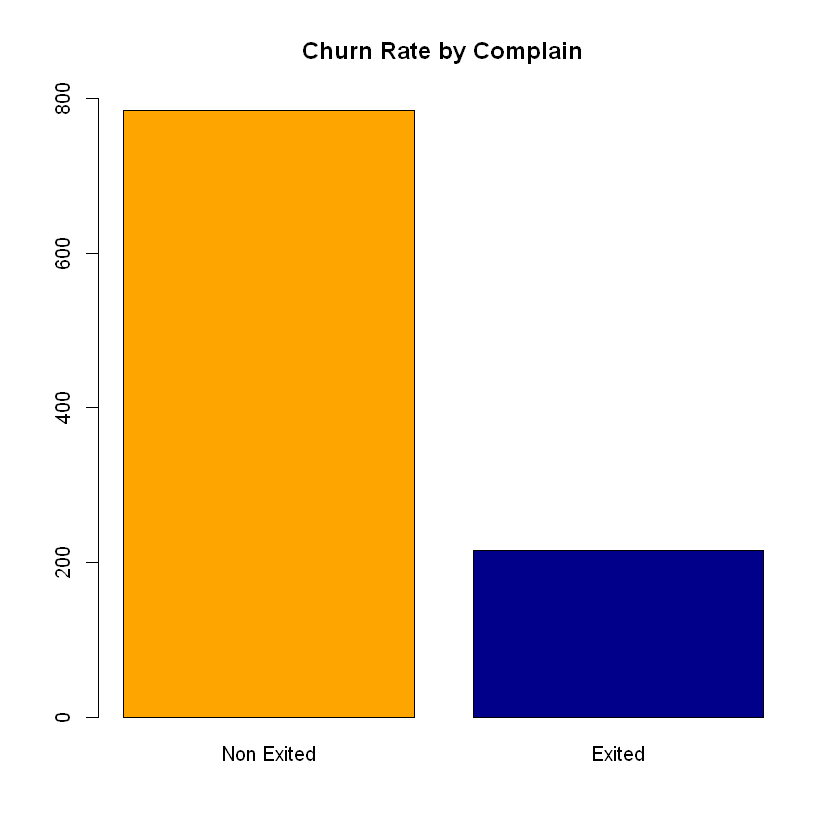

Warning message in plot.window(xlim, ylim, log = log, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"parametro grafico "legend" non valido"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"parametro grafico "legend" non valido"


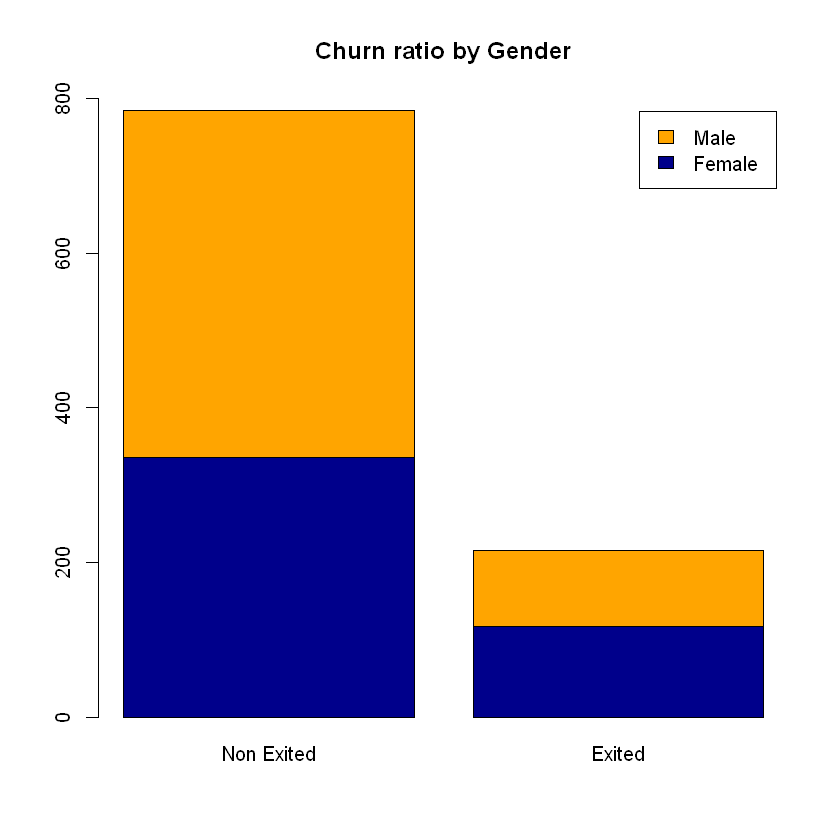

Warning message in plot.window(xlim, ylim, log = log, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"parametro grafico "legend" non valido"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"parametro grafico "legend" non valido"


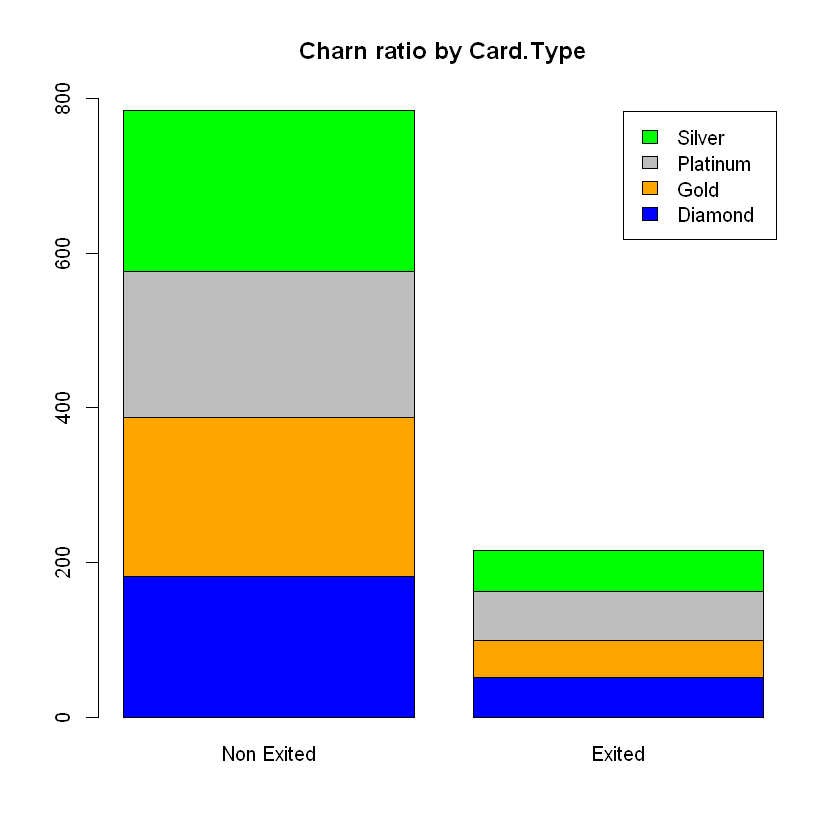

Warning message in plot.window(xlim, ylim, log = log, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"parametro grafico "legend" non valido"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"parametro grafico "legend" non valido"


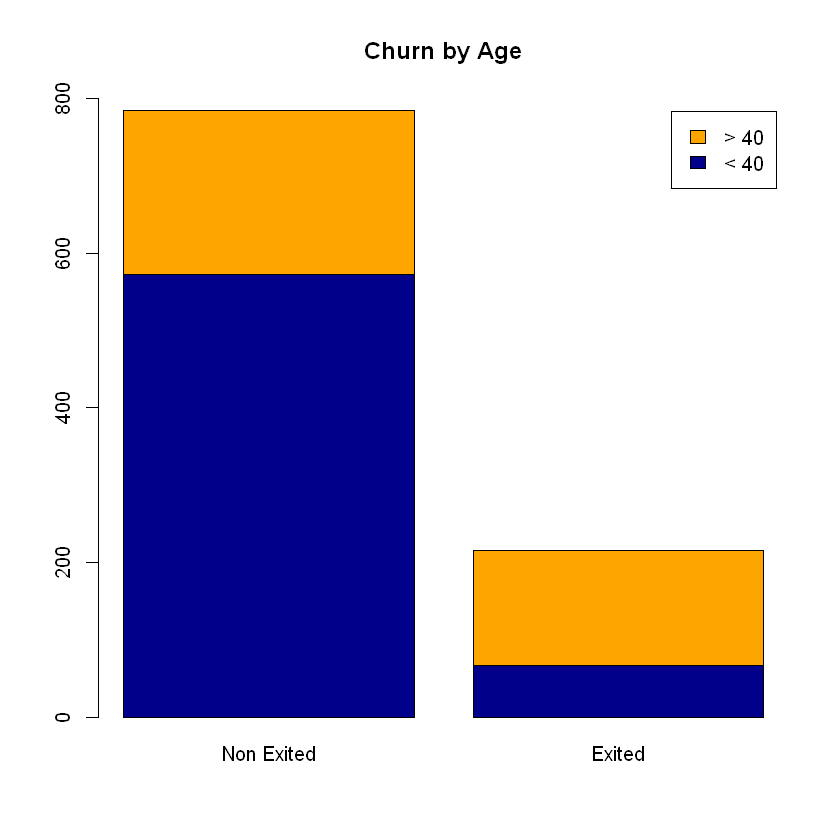

Warning message in plot.window(xlim, ylim, log = log, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"parametro grafico "legend" non valido"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"parametro grafico "legend" non valido"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"parametro grafico "legend" non valido"


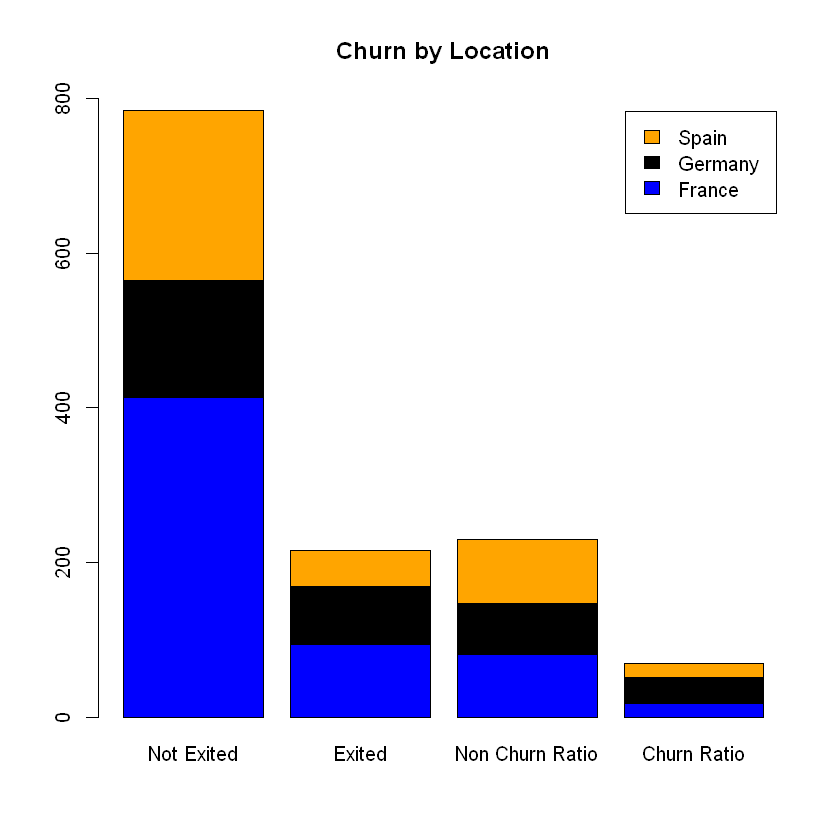


FALSE  TRUE 
  319   681 

       
          0   1
  FALSE 191  57
  TRUE  593 159

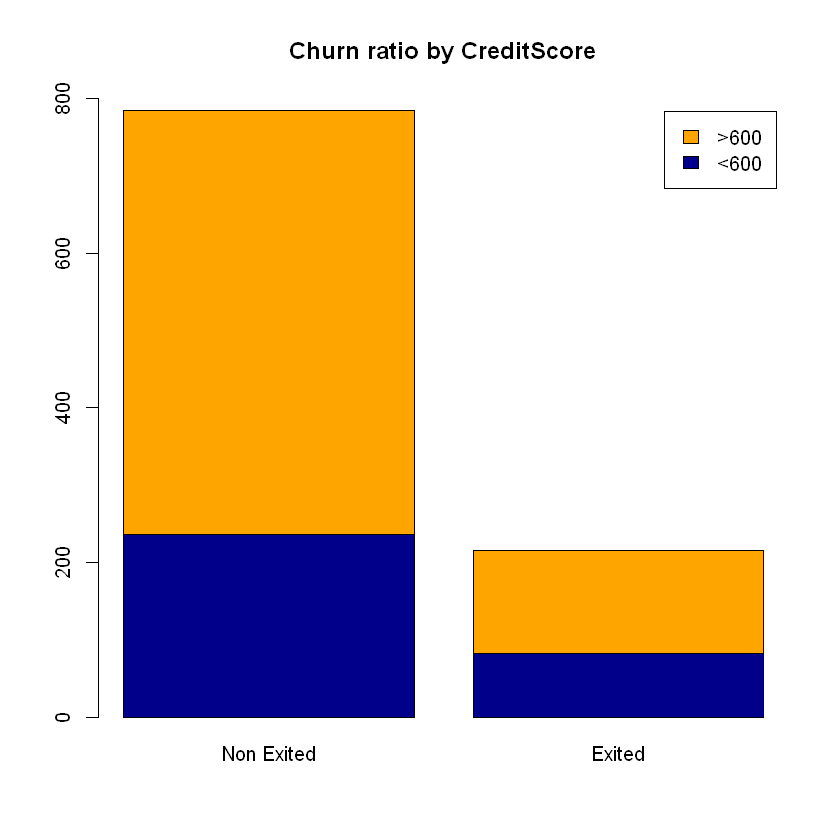

In [6]:
table_result=table(records$Geography, records$Exited)
# Add percentage calculation
table_percentage=prop.table(table_result, margin = 1) * 100
# Combine the count table and percentage table
result_table=cbind(table_result, table_percentage)
colnames(result_table)=c("Not Exited", "Exited", "Non Churn Ratio", "Churn Ratio")
print(result_table)
#making barplot to visulize data
barplot(table(records$Complain,records$Exited), main= "Churn Rate by Complain", ylim=c(0,800), names.arg = c("Non Exited", "Exited"), col=c("orange", "darkblue"))
barplot(table(records$Gender, records$Exited),  ylim=c(0,800), names.arg = c("Non Exited", "Exited"),col=c("darkblue", "orange"), main="Churn ratio by Gender", legend=TRUE,   legend.text = c('Female', 'Male'))
barplot(table(records$Card.Type, records$Exited), ylim=c(0,800), names.arg = c("Non Exited", "Exited"), col=c("blue", "orange", "grey", "green"), main="Charn ratio by Card.Type", legend=TRUE,   legend.text = c('Diamond', 'Gold', "Platinum", "Silver"))
barplot(table(records$Age>40, records$Exited), ylim=c(0,800), names.arg = c("Non Exited", "Exited"), col=c("darkblue", "orange"), main="Churn by Age", legend=TRUE,   legend.text = c('< 40', '> 40'))
barplot(result_table, col=c("blue", "black", "orange"), main="Churn by Location", ylim=c(0,800),legend=TRUE,   legend.text = c('France', 'Germany', "Spain" ))
barplot(table(records$CreditScore>600,records$Exited),ylim=c(0,800), names.arg = c("Non Exited", "Exited"),col=c("darkblue", "orange"), main="Churn ratio by CreditScore", legend=TRUE,   legend.text = c('<600', '>600'))
table(records$CreditScore>600)
table(records$EstimatedSalary<150000, records$Exited)

## MACHINE LEARNING

In [7]:
#PCA
#selecting only numerical attributes= credit-score, age, tenure, balance,numofproducts,salary, satisfaction score,points.earned)
records.num=records[,c(4,5,6,10,13)]
records.scaled=scale(records.num)
records.pc=prcomp(records.scaled)
records.pc
summary(records.pc)
#considering the result we have decided to use 4 PC because they explain 91.3% of the variance
records.pc$x
records.pc$x[,1:4]
#we made a sample of 1k observation to make easier to calculate and show clusters

Standard deviations (1, .., p=5):
[1] 1.0453094 1.0318362 0.9939638 0.9815717 0.9440313

Rotation (n x k) = (5 x 5):
                           PC1         PC2         PC3        PC4        PC5
Age                -0.02457815 -0.44983323  0.85555260  0.1948771  0.1646166
Tenure             -0.57336634 -0.34226143  0.02530244 -0.5539770 -0.4965656
Balance            -0.03314896 -0.60653919 -0.41184286  0.6261844 -0.2632298
EstimatedSalary     0.38829727 -0.55893658 -0.26154065 -0.4935350  0.4741675
Satisfaction.Score -0.72025921  0.01439738 -0.17138111  0.1394586  0.6574186

Importance of components:
                          PC1    PC2    PC3    PC4    PC5
Standard deviation     1.0453 1.0318 0.9940 0.9816 0.9440
Proportion of Variance 0.2185 0.2129 0.1976 0.1927 0.1782
Cumulative Proportion  0.2185 0.4315 0.6291 0.8218 1.0000

,PC1,PC2,PC3,PC4,PC5
2463,-1.05483117,-2.44001971,0.23980504,0.13896311,0.003408701
2511,0.99132530,-0.12303807,1.23300025,0.83649438,0.073106135
8718,1.01917566,0.30324658,0.65368396,-0.64861686,1.374424698
2986,-0.87943645,-0.13094004,-0.88193093,0.24442324,-1.285918837
1842,-1.26069772,1.00626079,-0.45778380,1.54558593,0.338274838
9334,-1.31508655,-1.88368624,2.76229191,1.56390288,1.177525973
3371,-1.01318443,0.76367914,1.29388883,-0.31941508,0.350898776
4761,1.80868121,-0.32285950,-0.13827850,0.01883298,0.788941876
6746,-0.51706200,0.86117824,1.96544890,0.47345861,0.899183613
9819,-0.71527391,-0.06863466,-0.79104715,-1.95012349,1.614043562


,PC1,PC2,PC3,PC4
2463,-1.05483117,-2.44001971,0.23980504,0.13896311
2511,0.99132530,-0.12303807,1.23300025,0.83649438
8718,1.01917566,0.30324658,0.65368396,-0.64861686
2986,-0.87943645,-0.13094004,-0.88193093,0.24442324
1842,-1.26069772,1.00626079,-0.45778380,1.54558593
9334,-1.31508655,-1.88368624,2.76229191,1.56390288
3371,-1.01318443,0.76367914,1.29388883,-0.31941508
4761,1.80868121,-0.32285950,-0.13827850,0.01883298
6746,-0.51706200,0.86117824,1.96544890,0.47345861
9819,-0.71527391,-0.06863466,-0.79104715,-1.95012349


Installazione pacchetto in 'C:/Users/anton/AppData/Local/R/win-library/4.3'
(perché 'lib' non è specificato)



pacchetto 'cluster' aperto con successo con controllo somme MD5

I pacchetti binari scaricati sono in
	C:\Users\anton\AppData\Local\Temp\Rtmp40zkJW\downloaded_packages


Warning message:
"il pacchetto 'cluster' è stato creato con R versione 4.3.3"


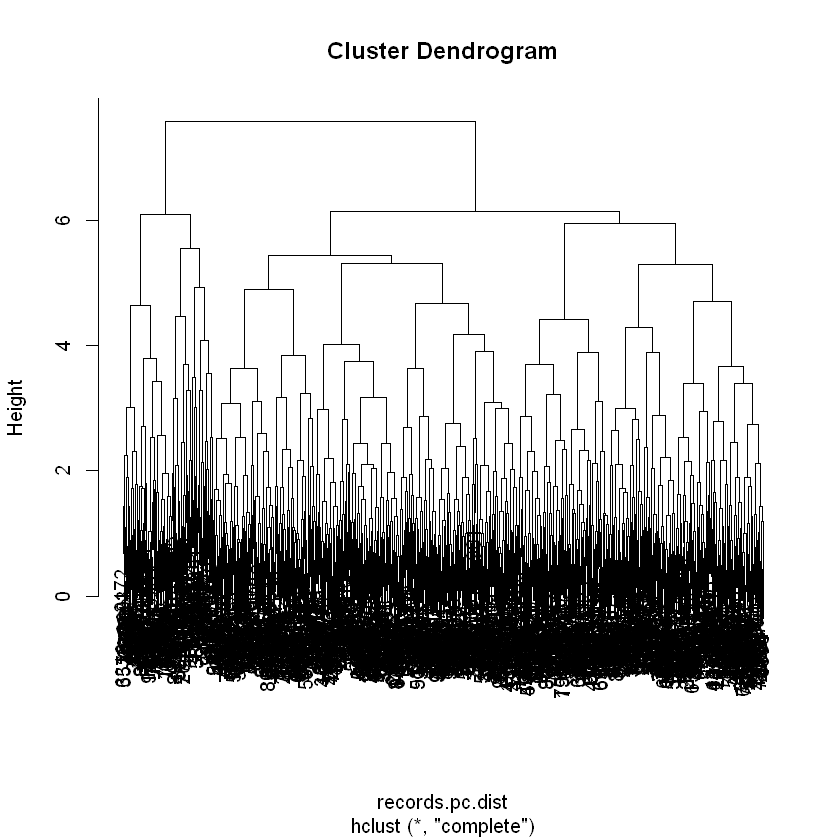

In [8]:
#CLUSTERING
#now find the distance
records.pc.dist=dist(records.scaled)
records.pc.hc=hclust(records.pc.dist)
plot(records.pc.hc)
# too large to use hierarchical clustering
# so we apply k-means
install.packages("cluster")
library("cluster")
records.dist=dist(records.scaled)

K-means clustering with 2 clusters of sizes 526, 474

Cluster means:
           Age      Tenure     Balance EstimatedSalary Satisfaction.Score
1  0.003558069  0.03871750 -0.09039123      -0.8079190          0.1764458
2 -0.003948406 -0.04296499  0.10030757       0.8965515         -0.1958028

Clustering vector:
2463 2511 8718 2986 1842 9334 3371 4761 6746 9819 2757 5107 9145 9209 2888 6170 
   2    1    2    1    1    1    1    2    1    2    2    1    1    1    1    1 
2567 9642 9982 2980 1614  555 4469 9359 7789 9097 1047 7067 3004 3207 7989 3995 
   2    1    1    2    1    2    1    1    2    2    1    2    2    1    2    1 
8358  217 9506 8157 6216 8780 1599 4237 3937 4089 2907  294 8469   41 8508 7391 
   1    2    1    2    1    1    1    1    2    2    1    2    2    1    2    2 
6672 7284 2504 6742 9375 8944 8566 6129 4612 2117 6134  755 6553 5428 9198 7127 
   2    2    2    1    1    1    1    1    1    1    1    1    2    1    2    2 
9640 3358 3980 9326 3230 5603 9693 4576 3

Group.1,Age,Tenure,Balance,EstimatedSalary,Satisfaction.Score
<int>,"<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>"
1,"18, 32, 37, 38.82129, 44, 80","0, 2, 5, 5.062738, 8, 10","0, 0, 91244.19, 71548.39, 124448.9, 206663.8","11.58, 25348.09, 52238.23, 51777.68, 76049.4, 118752.6","1, 2, 3, 3.279468, 4, 5"
2,"18, 32, 37, 38.74262, 44, 76","0, 2, 5, 4.820675, 7, 10","0, 0, 105555.07, 83265.35, 128677.9, 201696.1","82796.29, 126732.04, 152151.32, 151525.53, 176924.5, 199970.7","1, 2, 3, 2.772152, 4, 5"



  1   2 
526 474 

0.0000000,0.2237432
0.2237432,0.0000000
0.000000,3.283285
3.283285,0.000000


        cluster neighbor     sil_width
   [1,]       2        1  0.1111244168
   [2,]       1        2  0.0083598347
   [3,]       2        1  0.1821498980
   [4,]       1        2  0.1485546688
   [5,]       1        2  0.2786470273
   [6,]       1        2  0.0509675624
   [7,]       1        2  0.2227729573
   [8,]       2        1  0.2753978921
   [9,]       1        2  0.1916919695
  [10,]       2        1  0.1638537341
  [11,]       2        1  0.2616279979
  [12,]       1        2  0.1561763516
  [13,]       1        2  0.1099585073
  [14,]       1        2  0.2323994926
  [15,]       1        2  0.1408645675
  [16,]       1        2  0.2452829900
  [17,]       2        1  0.1452463863
  [18,]       1        2  0.0901450653
  [19,]       1        2  0.1447494252
  [20,]       2        1  0.1274085210
  [21,]       1        2  0.0499318269
  [22,]       2        1  0.2130056214
  [23,]       1        2  0.1269943172
  [24,]       1        2  0.2134940583
  [25,]       2        1 


Caricamento pacchetto: 'dbscan'


Il seguente oggetto è mascherato da 'package:fpc':

    dbscan


Il seguente oggetto è mascherato da 'package:stats':

    as.dendrogram




   
      0   1
  1 418 108
  2 366 108

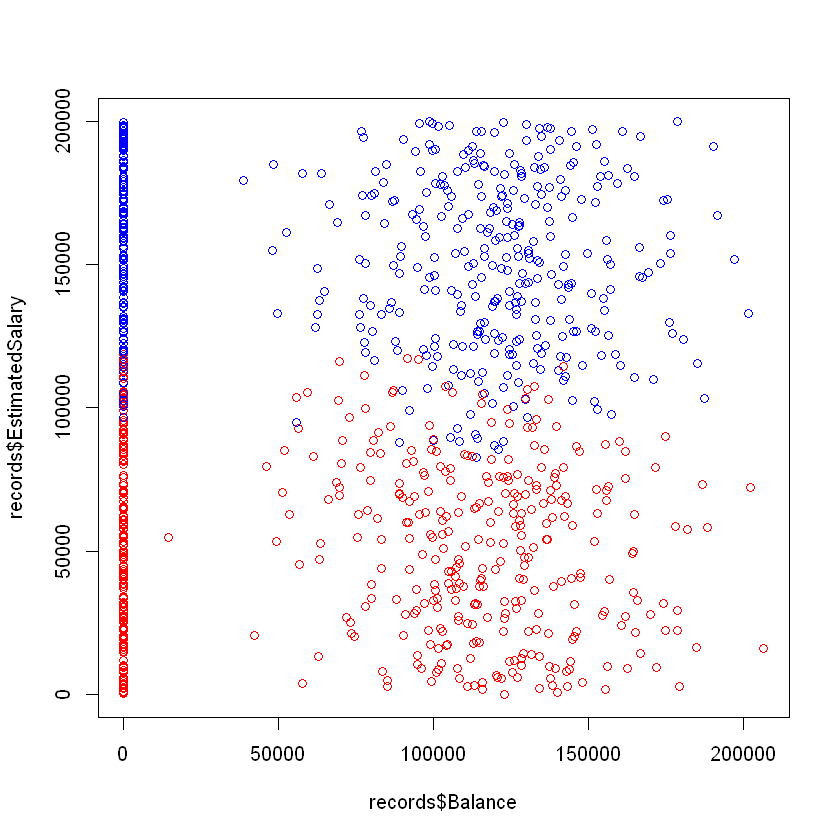

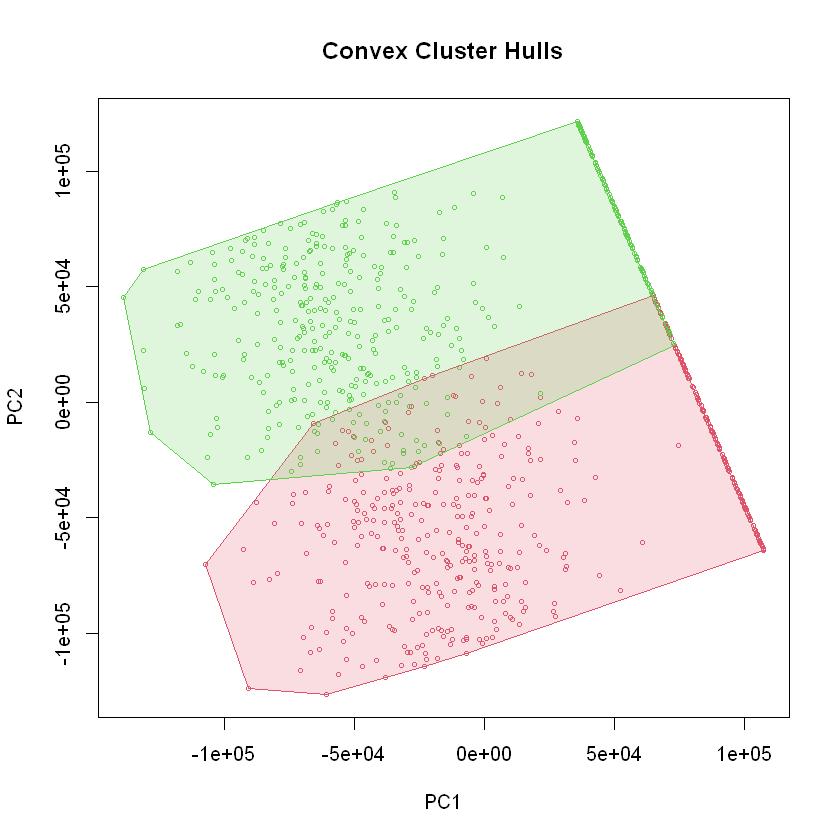

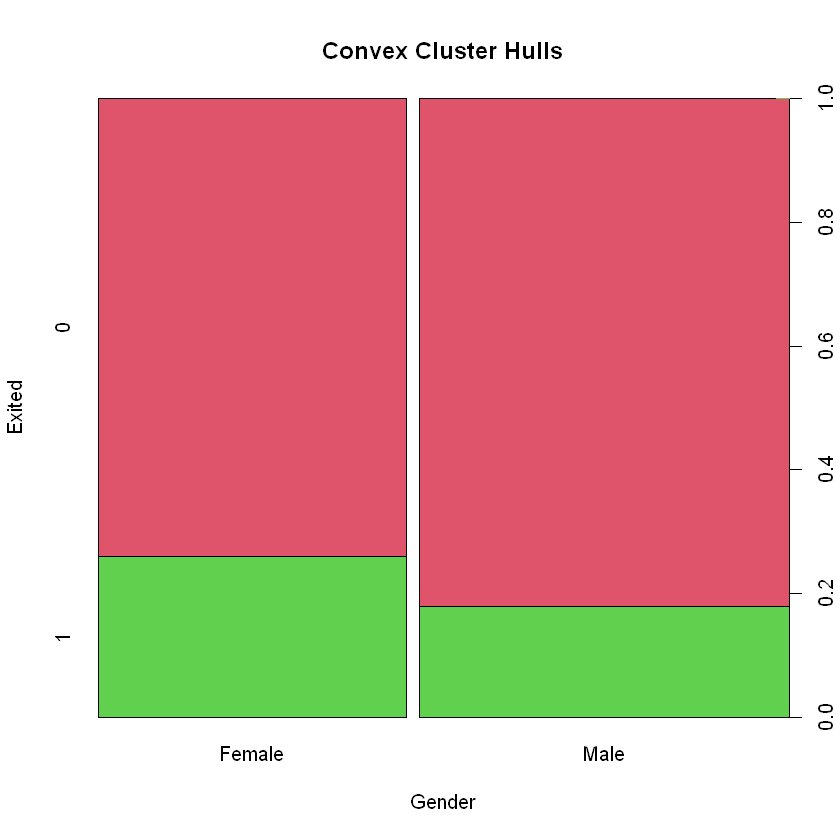

In [9]:
#K-MEANS
records.km2=kmeans(records.scaled,2)
records.km2
aggregate(records.num, by=list(records.km2$cluster), FUN=summary)
table(records.km2$cluster)
library(fpc)
cluster.stats(records.dist,records.km2$cluster)
silhouette(records.km2$cluster, records.dist)
myclustercolors=c("red", "blue")
library(dbscan)
table(records.km2$cluster, records$Exited)
plot(records$Balance, records$EstimatedSalary, col=myclustercolors[records.km2$cluster])
hullplot(records.num,records.km2$cluster)
hullplot(records[c(3,11)], records.km2$cluster)

Fuzzy c-means clustering with 2 clusters

Cluster centers:
            Age        Tenure      Balance EstimatedSalary Satisfaction.Score
1 -0.0001863469 -0.0008198606 -0.001200348   -0.0006810472      -0.0002474357
2  0.0001862201  0.0008198728  0.001200141    0.0006810395       0.0002474297

Memberships:
             1         2
2463 0.4994522 0.5005478
2511 0.5002765 0.4997235
8718 0.5003973 0.4996027
2986 0.4995995 0.5004005
1842 0.5001344 0.4998656
9334 0.4999008 0.5000992
3371 0.5004169 0.4995831
4761 0.5000967 0.4999033
6746 0.5003837 0.4996163
9819 0.4999425 0.5000575
2757 0.4998221 0.5001779
5107 0.5004647 0.4995353
9145 0.4994957 0.5005043
9209 0.5007091 0.4992909
2888 0.5001687 0.4998313
6170 0.5002414 0.4997586
2567 0.4995127 0.5004873
9642 0.5000806 0.4999194
9982 0.4998306 0.5001694
2980 0.4997514 0.5002486
1614 0.5001809 0.4998191
555  0.4996999 0.5003001
4469 0.5003075 0.4996925
9359 0.5001821 0.4998179
7789 0.4999223 0.5000777
9097 0.4995241 0.5004759
1047 0.5006136 0.4

,1,2
2463,0.4999847,0.5000153
2511,0.5003472,0.4996528
8718,0.5001668,0.4998332
2986,0.4998230,0.5001770
1842,0.4996902,0.5003098
9334,0.4999110,0.5000890
3371,0.4993066,0.5006934
4761,0.5006496,0.4993504
6746,0.4996758,0.5003242
9819,0.4998333,0.5001667


2463      2511      8718      2986      1842      9334      3371      4761 
0.4999847 0.5003472 0.5001668 0.4998230 0.4996902 0.4999110 0.4993066 0.5006496 
     6746      9819      2757      5107      9145      9209      2888      6170 
0.4996758 0.4998333 0.5004622 0.4999751 0.4995256 0.4997487 0.4999146 0.4995718 
     2567      9642      9982      2980      1614       555      4469      9359 
0.5004275 0.4994120 0.5002563 0.5003790 0.4997519 0.5001648 0.5002613 0.4994618 
     7789      9097      1047      7067      3004      3207      7989      3995 
0.5001822 0.5000159 0.4999499 0.4999110 0.4999381 0.4999561 0.5002509 0.4998581 
     8358       217      9506      8157      6216      8780      1599      4237 
0.4996412 0.4997455 0.4996661 0.4999652 0.5001409 0.4999047 0.4999667 0.5000831 
     3937      4089      2907       294      8469        41      8508      7391 
0.5008850 0.5006235 0.4996506 0.5002180 0.5005932 0.4993289 0.5006174 0.5001673 
     6672      7284      2504      6742      9375      8944      8566      6129 
0.5001403 0.5005659 0.5004132 0.4994120 0.4997216 0.4998103 0.4996627 0.5000303 
     4612      2117      6134       755      6553      5428      9198      7127 
0.5003481 0.4994132 0.4997396 0.5001103 0.5009043 0.4998668 0.5010925 0.5001250 
     9640      3358      3980      9326      3230      5603      9693      4576 
0.5007420 0.4993993 0.4991629 0.4994497 0.4997515 0.5004877 0.5002120 0.4999854 
     3783      7831      5967      9301      7816      9267      1386      4706 
0.4998547 0.4994386 0.4995160 0.4996999 0.4998467 0.5001634 0.4999966 0.4998009 
     2378      4044       686      6078      5027      6387      9039      7281 
0.4999144 0.4998983 0.5002963 0.5001252 0.4997110 0.4994599 0.4995230 0.4996214 
     9175      4715       151      6810      9830      8174      6911      2208 
0.4999859 0.4996556 0.4999943 0.4997199 0.5006937 0.5001734 0.5002276 0.5000444 
     1029      8518      7448      7735      8011      1956      8172      5358 
0.4994337 0.5000857 0.5000711 0.4996448 0.5001154 0.5002578 0.5002176 0.5002162 
     5884      4093       985      6183       986      4233      1584      4685 
0.4999493 0.5001185 0.4999692 0.4994457 0.4996243 0.5002090 0.4997154 0.5002933 
     7864      4776      6644      9894      8536      7478      2507       195 
0.4998255 0.4995948 0.4999480 0.4998304 0.5001476 0.5003912 0.4996533 0.5001303 
     3124      6678      4650      2132      3464      9518      3949      7757 
0.4999337 0.5002125 0.5005499 0.5008772 0.5003511 0.5003499 0.5001269 0.5005613 
     2758      3833       712      9644      5370      3501      3069      8720 
0.5000600 0.4998851 0.5006183 0.4998107 0.4997821 0.5000159 0.4995284 0.5002116 
     4055      9761       473      6098      1149      2037      2313      7741 
0.4998271 0.5006501 0.5002289 0.4995201 0.4998988 0.4996766 0.4995862 0.4996871 
     8650      1078      5015      5658      6379      1313       185      7933 
0.5000585 0.4998362 0.5001439 0.5001000 0.4997856 0.4989926 0.4997940 0.4994392 
      413      4723      1333      4875      9753       564      8986      9607 
0.5000670 0.5000026 0.5009166 0.4994655 0.5000045 0.5000823 0.5005248 0.4995943 
     3799      9562      4256      3581      3129      6601      4713      8549 
0.4998466 0.4997165 0.4995327 0.5004928 0.5006875 0.5003446 0.5000677 0.4999490 
      279      4366      6790      6491      3201      2266       618      1905 
0.5004872 0.4998306 0.5000870 0.5000292 0.5002304 0.4999615 0.4999728 0.5002371 
     8529       539      9148      3625      6868      3462      5618      6815 
0.4997779 0.4998830 0.5002125 0.5005538 0.5000568 0.5013470 0.5009246 0.4998120 
     7005      6801      3008      9637      6804      2211      2286      5793 
0.4999916 0.4992737 0.5005226 0.5000125 0.4996477 0.4999845 0.5003047 0.4994177 
     7684      9920      5509      4213      9271      9433      7826      1706 
0.5005455 0.4999866 0.4999268 0.4999

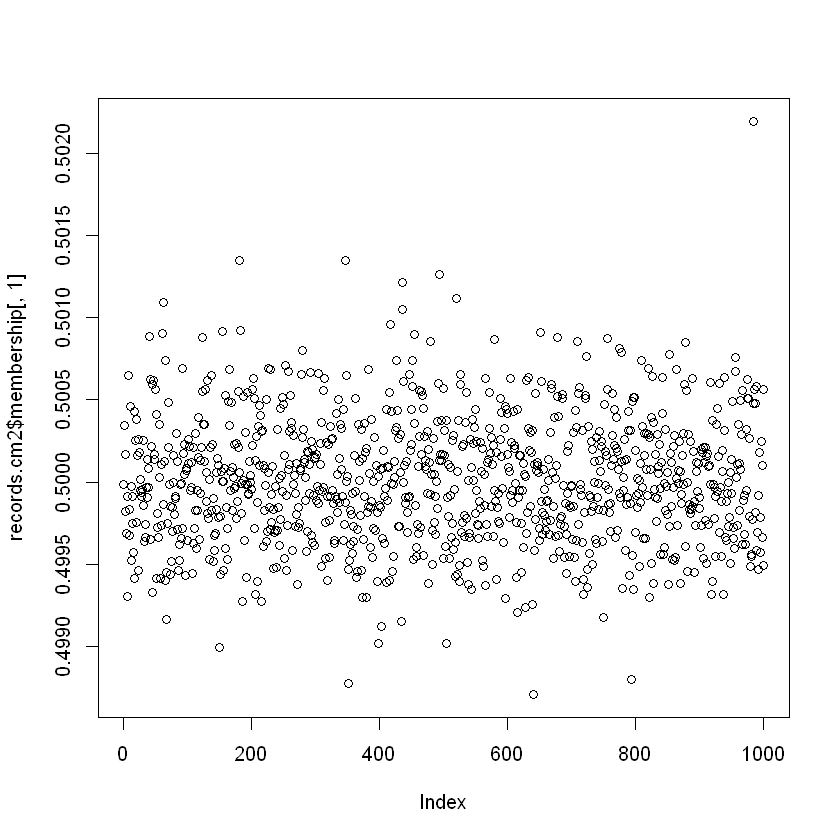

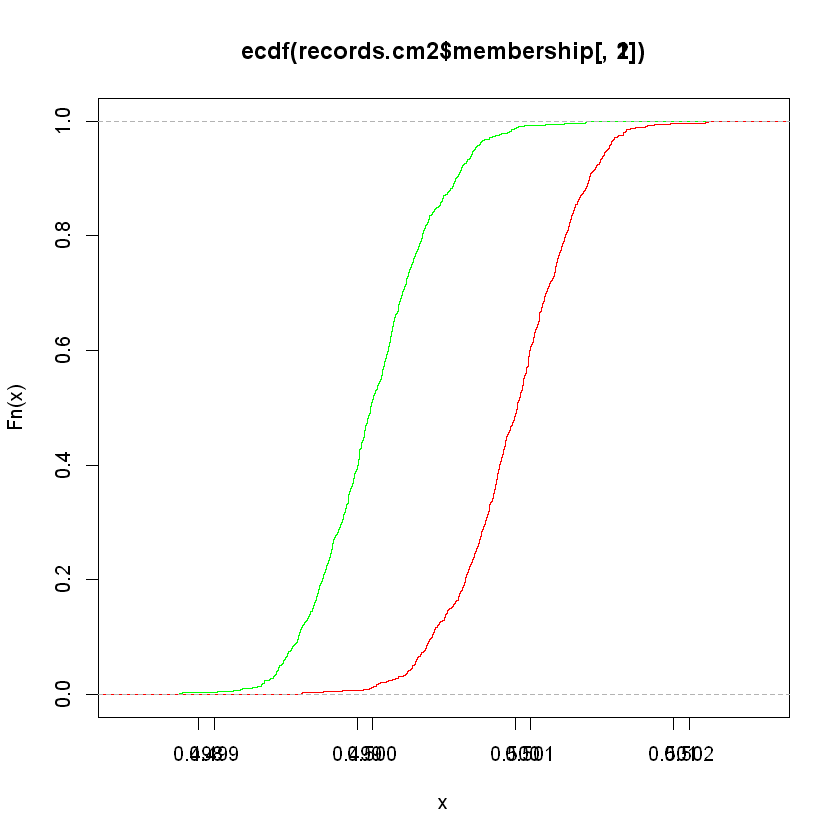

In [10]:
#C-MEANS
library(e1071)
cmeans(records.scaled,2)
records.cm2=cmeans(records.scaled,2)
records.cm2$membership
records.cm2$membership[,1]
plot(records.cm2$membership[,1])
plot(ecdf(records.cm2$membership[,1]), ylim=c(0,1),col="green")
par(new=T)
plot(ecdf(records.cm2$membership[,2]), ylim=c(0,1), col="red")

Warning message:
"il pacchetto 'rpart' è stato creato con R versione 4.3.2"
Warning message:
"il pacchetto 'rpart.plot' è stato creato con R versione 4.3.2"


[1]  583 2138 7359 5821 4602 1714 2933 2290 3284  272 4504 6017 2438 3272
  [15]  707 5958 4219 4086 5776 2082 3342 5179 1734 5911 7125 2177 2774 1604
  [29] 1947 5675 6127 2910 2590 7874 5012 7188 6464 3073 7712 4938 5612 1721
  [43] 2894 5441 3314 1447 1675 5110 6567 1309 2990 5339  754 4165 2262 3002
  [57] 1198  812 2600 5280 8000 7946 5476 7521 4002 2049 6885 1803 5288 5168
  [71] 6029 1553 5998 2187 7616 4337 3642 1738 1842 1166 3852  224  256  132
  [85] 7417 4411  636 6187 2075 1252  745 2866 5361 5964 5385 1424 2686 4892
  [99] 3932 2428 2125 5063 7542 3587 6615 7163 1548 6488 1812 3984 3105 6849
 [113] 5881 1716 7397 5008 2851 4879 1753 2813 7929 3862 3301  926 3753  362
 [127]  525 3641 5733 3329 6836 3788 3316  287 1773 4032 3038 7586 3114 7806
 [141] 7429 2691  109 4941 4815 1286 4289 2122 3255 7026 3737 7913 5652 5586
 [155] 1167 4570  551 2435 1880 5949 5395 1445 3375 7379  822 4359 2268 7184
 [169] 6149 4248 2744 7283 6826 3617  116 4900   27 2239 1300 1417 6213 3975
 [183] 2741 2081 2100 7170  875  513 5229 3487 3754 7168  882 3844 6692 2810
 [197] 2752 2722 6544 6204 3728 1448 1789 4470 3939 3028 2674  427 5265 1296
 [211] 7936 4360 6341 6924 1723 5727 6383 5527 3522  527 7077  297 1999 6503
 [225] 3945 2008 5449 2507  714 6961 4330 7279 6951 7324 2449 3564 2981 4771
 [239] 1106 3278  701 3015 5165 4767 6531 3362 1049 1227 6122 6009 7120 6841
 [253] 1780 2683  890 5859 1444 3463 1802 3604 5694 5009 3285 7403  462 4739
 [267]  180 4942 7136  113 1381 6174 2339  206 5649 4875 5633 4937 2107 7643
 [281] 2499  436 4524 1430 3628 7600 1961  862 2633 2063 3619 5512 2864 6746
 [295] 1899 7169 4335 5351 7453 4414 2710 4247 4895 3339 4063 3224  496 6938
 [309] 3185 2033 5210 5032 6147 1684 3688 3669 7310  144 5723 1744 6499 3982
 [323] 1114 1873 7998  415 2065 3565 3540 4674 3344  782 5856 5758 6185 5144
 [337] 1151  541 5397 1883 7948 3838 7261 6875 7767 1162 3165  948 2706 5218
 [351] 3839 7659 4228 2217 3119 1860 1676 5917 1202  715 4730 6631 7657 2078
 [365] 3908 2058 4183 7596 3440 3906 7200  690 3756 5382 3690  721 2536 3480
 [379] 4992 7955 3790 6859  858  984 1834 4563 7649  303 7275 5258 3503 5490
 [393]  929 3607 2463 6806 2932  727 4765 1694 1993  743 7556 7042 1690 7380
 [407] 4732 7905 5933 1275 2417 3040 1575 6454 2765 6055 4856  894 1699 5169
 [421]  472 7973 7804 5979 1488  840 1091 3281 2965 6519 3486 2349 5450 2341
 [435] 2747 3786 5124 7512  660 7083 3118 2148 5217 5358 2318 7896  949 4311
 [449] 4018 2751 6903 7204 6304 2385 1775 3035 4309 3863 5584  364 2109 3464
 [463] 4930 6640 5884 4049 1315  898 2411  161  394  723 5022   58 7545 4449
 [477] 2111 6034 7917  958 2199  258 5930 5024 2144 7871 7919 4157  193 7272
 [491] 1619 6184 4188 4510 1751 2593 3018 1840 4423 7584 2790  279 3414 4782
 [505] 4537 7103 6397 6730 6046 3797 3940 2251 3116 1862 5628 5701 7095 2960
 [519] 2991 3197 1722 7177 7196  705 4402 1066 2961 3290 3796 2738  678 3385
 [533] 6987  532 6038 1752 5689 3059 2758 2009 1432 4403 4762 6420 6285 6860
 [547] 4194 4567 1085 6844 6358 6918 1104 2521  474 3919 5929 4147 1634 3791
 [561] 1086 7432 6656  181 2279 1682  350 1489 1184 6637 2298  590  916 5442
 [575] 4213 5030 4828 7019 5099 6891 7997  669 6983 7543  359 6919 4883 7126
 [589] 7007 1322 4784 7601 2027 6294 1884 3773 7813 7765 5980 4097 2356 4325
 [603] 7677 7705 4307  578 7751 4673 7606 2313 6658  569 6846  938 2036   66
 [617] 5146 7472 4215 3198 1236 2413 5101 2624 7227 1215 3629 3273 2636 6819
 [631] 4966 2029 5340 4638 5503 5918 5719 4208 1827 6646  855 1230  438 5809
 [645]  873 2847 2846 5660 4816 3765 2070  567 7572 5792 4981 1475 6158 3318
 [659] 4918 1133 4574 4622  274 2026 1972 4472  798 4210 5465 4432 2317  428
 [673] 1653  730 7320 5983 4265 7347 3355 5002 2522 2548 1661 6914  326 3036
 [687] 6201 7501 5570  173 2002 5138  640 7175 6670  568 1970 6502  674  816
 [701] 6354 1342 7030 5912  457 4905 1025 1344  505 4770 4850 3517 1629 6310
 [715] 7552 4241 7010 6402 4006 5990 6240 2830 4859  897 3322 2745  447  445


  0   1 
784 216 


  0   1 
218  50 


  0   1 
566 166 

,0,1
8079,0.8333333,0.1666667
3959,0.8939394,0.1060606
4313,0.8939394,0.1060606
7254,0.7500000,0.2500000
5751,0.1250000,0.8750000
2470,0.8939394,0.1060606
6518,0.8333333,0.1666667
9644,0.8939394,0.1060606
9260,0.8939394,0.1060606
8912,0.8939394,0.1060606


8079 3959 4313 7254 5751 2470 6518 9644 9260 8912 9605 5309  786 2421  986 3421 
   0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0 
9679 9894 1047   45 4997 9976 9622 7274 7216 9370 8416  764 4944 3625 7864 9970 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0 
 242 6511 4042 7741  251 7002 3335 4961 6161 2639 9012 1494 9412 7516 6142 1711 
   0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0 
1446 3167  577 1235 9328 5990 8503  756 3799 7508 6179 2117 7133 5497 7684 3786 
   0    1    0    0    0    1    0    0    0    1    0    0    1    0    0    0 
1886 4738 3128 1015 6868 3984 3017 5317 7559 9994 3951 6316 5483 3358 7461 7996 
   0    0    0    0    0    1    0    0    0    0    0    1    0    0    0    0 
9451 8970 4721 2798 5544 8861 9048 3201 9632 1352 3337  825 4695 2579  887 3556 
   0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0 
8185 4190 2378 7575 5242 7705 4303 3301 9453 1060 3949 8841 3699 4256 8174 3525 
   0    0    0    0    0    0    1    0    0    0    0    0    0    0    1    0 
1807 4244 8433 7457 4357 1549 5552 6007 6379 9936 2154 1666 3827 6779 6152 6170 
   0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0 
1347 6483 2406 5769 9612 2518 3995 9778 9174 6623 9932 6312  466 8312 4526 7601 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
6986 5356 6263 7646 8571 5618 1264 4494 2269 2567  549 7639 2004 1760 5001 5827 
   0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0 
8848 1394 9491 6083 2210 6038 3311 9314 5338 3727 5345 4213 4106 6790 6183 9185 
   0    0    0    0    0    0    0    0    1    1    0    0    0    0    0    0 
 319 2423 3318 3765 6406 5407 7727 4685 8518 6909 4084 5699 8392 9145 3069  602 
   0    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0 
4776 6736 1565 9869 1442 3468 5717 8124 1498 6258 9298 8558 8236 6825 7593 2765 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
4490 1517 9562 9964  860 8611 6155 3146 3091 5814 7392 7455  539 7978  742 4520 
   0    0    0    0    0    0    0    1    0    0    0    0    1    1    0    0 
7134 3903 1703 6932 1365 7082 4090 4388 8011 7690 4567 5884 1627 8566 6910 5214 
   0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0 
8390 7281 1723 4875 6424 7701  269 9642 4247 8118 4682 3612 8157 5178 1464 3035 
   0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0 
8986 7897 2463 7196 4046  270 8112 3716   31 9680  335 5732 
   0    0    1    0    0    0    0    1    1    0    0    0 
Levels: 0 1

   records.test.pred
      0   1
  0 541  25
  1 105  61

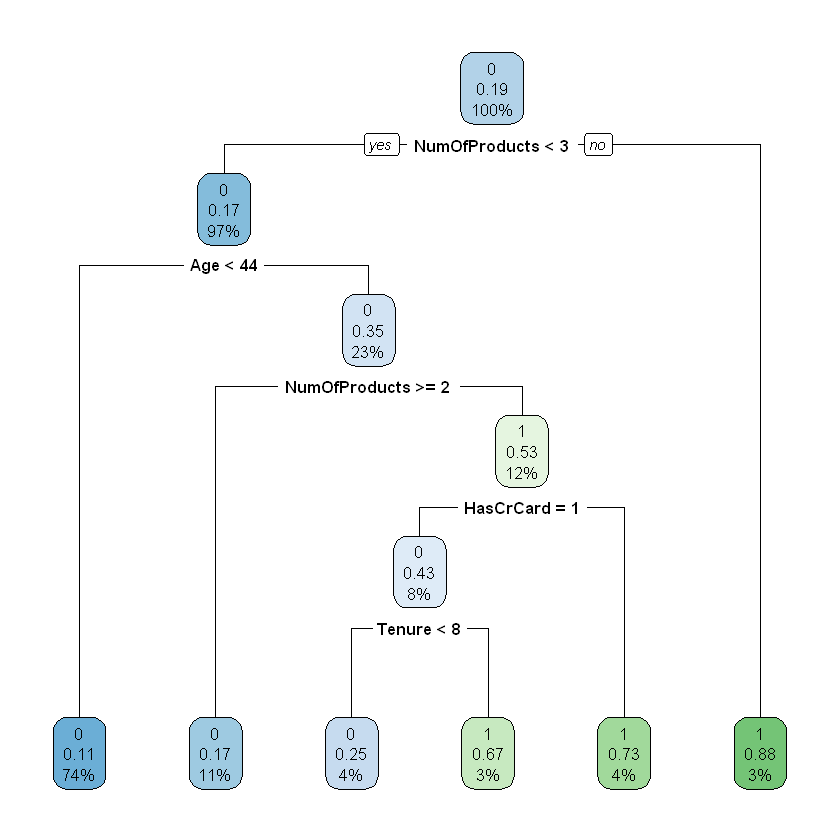

,0,1
8079,1,0
3959,1,0
4313,0,1
7254,0,1
5751,0,1
2470,0,1
6518,1,0
9644,1,0
9260,1,0
8912,1,0


8079 3959 4313 7254 5751 2470 6518 9644 9260 8912 9605 5309  786 2421  986 3421 
   0    0    1    1    1    1    0    0    0    0    0    0    0    0    0    0 
9679 9894 1047   45 4997 9976 9622 7274 7216 9370 8416  764 4944 3625 7864 9970 
   0    0    1    0    0    1    0    0    0    0    0    0    0    0    0    0 
 242 6511 4042 7741  251 7002 3335 4961 6161 2639 9012 1494 9412 7516 6142 1711 
   0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0 
1446 3167  577 1235 9328 5990 8503  756 3799 7508 6179 2117 7133 5497 7684 3786 
   0    1    0    0    0    1    0    0    0    1    0    0    1    0    0    0 
1886 4738 3128 1015 6868 3984 3017 5317 7559 9994 3951 6316 5483 3358 7461 7996 
   0    0    1    0    0    1    0    0    1    0    0    1    0    0    0    0 
9451 8970 4721 2798 5544 8861 9048 3201 9632 1352 3337  825 4695 2579  887 3556 
   0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    1 
8185 4190 2378 7575 5242 7705 4303 3301 9453 1060 3949 8841 3699 4256 8174 3525 
   1    0    0    0    0    0    1    1    0    0    0    0    0    0    0    0 
1807 4244 8433 7457 4357 1549 5552 6007 6379 9936 2154 1666 3827 6779 6152 6170 
   0    1    1    0    0    0    0    0    1    0    1    0    0    0    0    0 
1347 6483 2406 5769 9612 2518 3995 9778 9174 6623 9932 6312  466 8312 4526 7601 
   0    0    0    0    0    0    0    0    1    0    0    0    0    1    0    0 
6986 5356 6263 7646 8571 5618 1264 4494 2269 2567  549 7639 2004 1760 5001 5827 
   0    0    1    0    0    1    0    0    1    0    0    0    0    0    0    0 
8848 1394 9491 6083 2210 6038 3311 9314 5338 3727 5345 4213 4106 6790 6183 9185 
   0    0    0    0    0    0    0    0    1    1    0    0    0    0    0    0 
 319 2423 3318 3765 6406 5407 7727 4685 8518 6909 4084 5699 8392 9145 3069  602 
   0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0 
4776 6736 1565 9869 1442 3468 5717 8124 1498 6258 9298 8558 8236 6825 7593 2765 
   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
4490 1517 9562 9964  860 8611 6155 3146 3091 5814 7392 7455  539 7978  742 4520 
   0    0    0    0    1    0    0    1    1    0    0    0    1    0    0    0 
7134 3903 1703 6932 1365 7082 4090 4388 8011 7690 4567 5884 1627 8566 6910 5214 
   0    1    0    0    0    0    0    0    1    0    0    0    1    1    0    0 
8390 7281 1723 4875 6424 7701  269 9642 4247 8118 4682 3612 8157 5178 1464 3035 
   0    0    0    0    0    0    1    0    0    1    0    0    0    1    0    0 
8986 7897 2463 7196 4046  270 8112 3716   31 9680  335 5732 
   0    0    1    0    0    0    0    1    1    0    0    1 
Levels: 0 1

   records.test.pred
      0   1
  0 566   0
  1   0 166

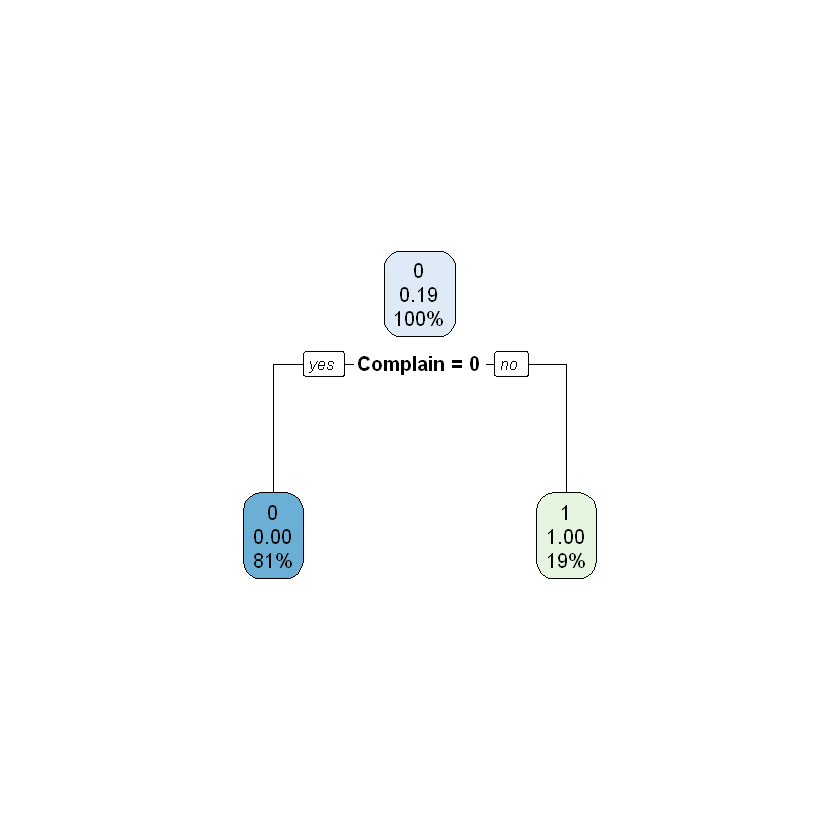

In [11]:
#DECISION TREES
library(rpart)
library(rpart.plot)
records.idx=sample(8000, 2000)
records.idx
records.train=records[records.idx, ]
records.test=records[-records.idx, ]
table(records$Exited)
table(records.train$Exited)
table(records.test$Exited)
records.dt1=rpart(Exited ~.-Complain, data=records.train)
rpart.plot(records.dt1)
predict(records.dt1, data=records.test)
#probability associated with the various classification 
predict(records.dt1, data=records.test, type="class")
#store it in a variable
records.test.pred=predict(records.dt1, records.test,type="class")
table(records.test$Exited, records.test.pred)
accuracy1=(540+61)/(540+25+106+61)
records.dt2=rpart(Exited ~Complain+Age+Gender+Geography+Tenure+Satisfaction.Score, data=records.train)
rpart.plot(records.dt2)
predict(records.dt2, data=records.test)
#probability associated with the various classification 
predict(records.dt2, data=records.test, type="class")
#store it in a variable
records.test.pred=predict(records.dt2, records.test,type="class")
table(records.test$Exited, records.test.pred)
accuracy2=(591+152)/(591+152)

Installazione pacchetto in 'C:/Users/anton/AppData/Local/R/win-library/4.3'
(perché 'lib' non è specificato)



pacchetto 'randomForest' aperto con successo con controllo somme MD5

I pacchetti binari scaricati sono in
	C:\Users\anton\AppData\Local\Temp\Rtmp40zkJW\downloaded_packages


Warning message:
"il pacchetto 'randomForest' è stato creato con R versione 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



,MeanDecreaseGini
CreditScore,9.448030
Geography,2.631307
Gender,1.615899
Age,13.479635
Tenure,6.454781
Balance,8.273503
NumOfProducts,8.117306
HasCrCard,1.657452
IsActiveMember,1.336700
EstimatedSalary,9.655819


   records.rf1.pred
      0   1
  0 558   8
  1 137  29

[1] 13.479635  9.762912  9.655819  9.448030  8.273503  8.117306  6.454781
 [8]  4.224920  3.947520  2.631307  1.657452  1.615899  1.336700

,MeanDecreaseGini
CreditScore,3.0833350
Geography,0.7910707
Gender,0.5064949
Age,5.6046389
Tenure,2.0573857
Balance,2.5306652
NumOfProducts,4.0015174
HasCrCard,0.4982032
IsActiveMember,0.3809916
EstimatedSalary,2.9864063


   records.rf2.pred
      0   1
  0 566   0
  1   0 166

[1] 53.4912462  5.6046389  4.0015174  3.1038352  3.0833350  2.9864063
 [7]  2.5306652  2.0573857  1.1951158  1.1821148  0.7910707  0.5064949
[13]  0.4982032  0.3809916

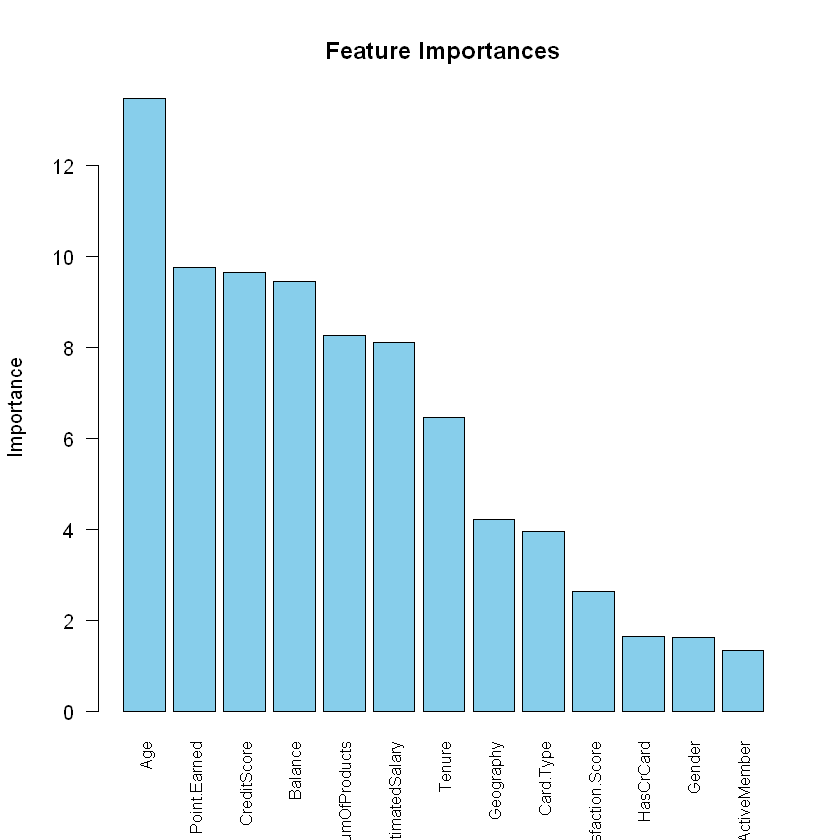

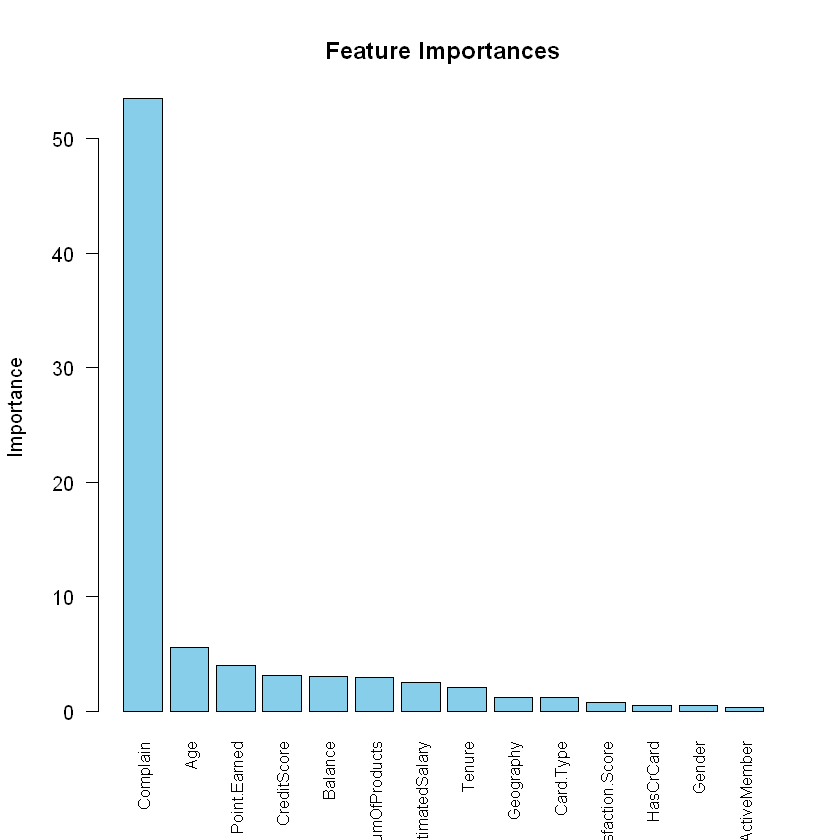

In [12]:
#RANDOM FOREST
#random forest to check accuracy of the model
install.packages("randomForest")
library(randomForest)
help(randomForest)
records.train=na.omit(records.train)
records.rf1=randomForest(Exited ~.-Complain, data=records.train )
records.rf1.pred=predict(records.rf1, records.test)
records.rf1$importance
table(records.test$Exited, records.rf1.pred)
accuracy3=(558+31)/(558+31+7+136)
records.rf1.sorted=sort(decreasing=TRUE, records.rf1$importance)
records.rf1.sorted
variables.rf1.names=c("Age", "Point.Earned", "CreditScore", "Balance", "NumOfProducts", 
                      "EstimatedSalary", "Tenure", "Geography", "Card.Type", 
                      "Satisfaction.Score", "HasCrCard", "Gender", "IsActiveMember")
barplot(records.rf1.sorted, names.arg=variables.rf1.names,
        main = "Feature Importances", ylab = "Importance", 
        col = "skyblue", las = 2, cex.names = 0.8)
#try with complain 
records.rf2=randomForest(Exited ~., data=records.train )
records.rf2.pred=predict(records.rf2, records.test)
records.rf2$importance
table(records.test$Exited, records.rf2.pred)
accuracy4=1
records.rf2.sorted=sort(decreasing=TRUE, records.rf2$importance)
records.rf2.sorted
variables.rf2.names=c("Complain","Age", "Point.Earned", "CreditScore", "Balance", "NumOfProducts", 
                      "EstimatedSalary", "Tenure", "Geography", "Card.Type", 
                      "Satisfaction.Score", "HasCrCard", "Gender", "IsActiveMember")
barplot(records.rf2.sorted, names.arg=variables.rf2.names,
        main = "Feature Importances", ylab = "Importance", 
        col = "skyblue", las = 2, cex.names = 0.8)